## Tools

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

## Dataset

In [2]:
data = pd.read_csv("Breast_cancer_data.csv")
data.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


## Data Visualization

<Axes: >

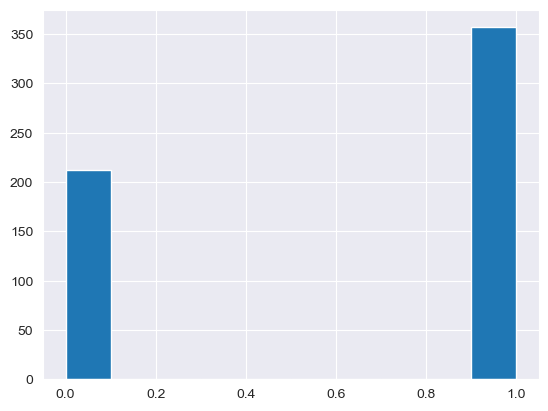

In [3]:
data["diagnosis"].hist()

## Note:
corr(method="pearson"): This calculates the Pearson correlation coefficients between the selected features. Pearson correlation measures the linear  relationship between two continuous variables, and it ranges from -1 to 1.

sns.diverging_palette(): This function from the seaborn library creates a diverging color palette.
The parameters 250 and 354 specify the starting and ending hues of the color palette.
80 and 60 control the saturation of the colors.
center='dark': Specifies that the center of the color palette should be a darker shade.
as_cmap=True: Indicates that the result should be treated as a colormap.

sns.heatmap(): This function from seaborn is used to create a heatmap.
corr: The correlation matrix calculated earlier.
vmax=1: The maximum value on the color scale (set to 1 for positive correlations).
vmin=-.5: The minimum value on the color scale (set to -0.5 for negative correlations).
cmap=cmap: The colormap created using diverging_palette.
square=True: Ensures that the heatmap is square-shaped.
linewidths=.2: Width of the lines that divide the cells in the heatmap.

<Axes: >

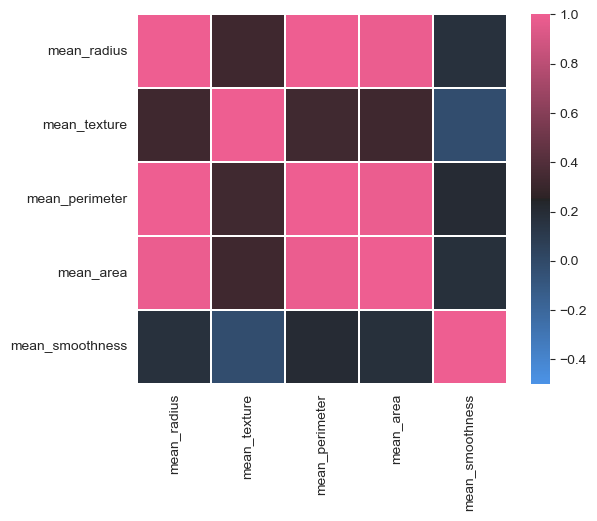

In [4]:
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [5]:
data = data[["mean_radius", "mean_texture", "mean_smoothness", "diagnosis"]]
data.head(5)

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0


<Axes: >

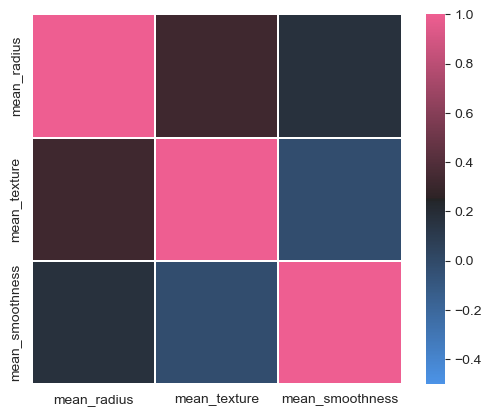

In [6]:
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

# Note:
plt.subplots(1, 3, figsize=(18, 6), sharey=True): This function from the matplotlib.pyplot library creates a grid of subplots.

1 row and 3 columns indicate that there will be three subplots arranged horizontally.
figsize=(18, 6): Specifies the size of the entire figure.
sharey=True: Shares the y-axis among all subplots, ensuring that they have the same scale.
fig, axes: The returned fig is the entire figure, and axes is an array of the subplot axes.

sns.histplot(): This function from the seaborn library creates a histogram.
data: The dataset you are plotting.
ax=axes[0], ax=axes[1], ax=axes[2]: Specifies the subplot axes for each histogram.
x="mean_radius", x="mean_smoothness", x="mean_texture": The specific feature from the dataset to be plotted on the x-axis for each subplot.
kde=True: Adds a kernel density estimate (smoothed line) to the histogram.
color='r', color='b': Specifies the color of the histogram bars for the first two subplots. The third subplot uses the default color.



<Axes: xlabel='mean_texture', ylabel='Count'>

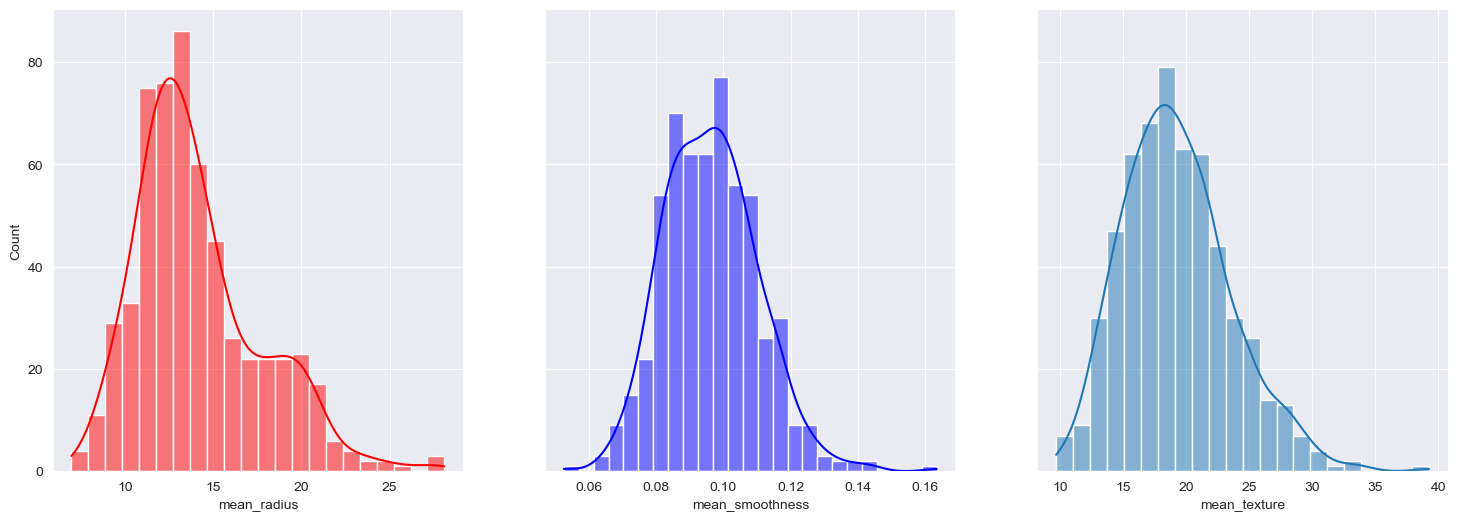

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(data, ax=axes[0], x="mean_radius", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="mean_smoothness", kde=True, color='b')
sns.histplot(data, ax=axes[2], x="mean_texture", kde=True)


In [8]:
X = data.values[:, :-1]
y = data.values[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, 
                                                    random_state = 100)

In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
clf = GaussianNB()

In [12]:
clf.fit(X_train,y_train)

GaussianNB()

In [13]:
y_predict = clf.predict(X_test)
y_predict

array([0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.])

In [14]:
clf.score(X_test,y_test)

0.8947368421052632

F1 Score:, "y_predict


In [16]:
from sklearn.naive_bayes import ComplementNB

In [17]:
clf = ComplementNB()

In [18]:
clf.fit(X_train,y_train)

ComplementNB()

In [19]:
y_predict = clf.predict(X_test)
y_predict

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1.])

In [20]:
clf.score(X_test,y_test)

0.631578947368421